In [1340]:
# glob get files in large_proposal_votes_2023_07_21
import glob
all_files = glob.glob("large_proposal_votes_2023_07_21/*/*.json")
print(all_files)

['large_proposal_votes_2023_07_21/0x635d76930c9f55dca299c50c60c93d0964c8751671405249f80cc04fa9b2a7da/votes_1686096989.json', 'large_proposal_votes_2023_07_21/0x635d76930c9f55dca299c50c60c93d0964c8751671405249f80cc04fa9b2a7da/votes_1686914551.json', 'large_proposal_votes_2023_07_21/0x635d76930c9f55dca299c50c60c93d0964c8751671405249f80cc04fa9b2a7da/votes_1686842462.json', 'large_proposal_votes_2023_07_21/0x635d76930c9f55dca299c50c60c93d0964c8751671405249f80cc04fa9b2a7da/votes_1686130309.json', 'large_proposal_votes_2023_07_21/0x635d76930c9f55dca299c50c60c93d0964c8751671405249f80cc04fa9b2a7da/votes_1686238756.json', 'large_proposal_votes_2023_07_21/0x635d76930c9f55dca299c50c60c93d0964c8751671405249f80cc04fa9b2a7da/votes_1686150042.json', 'large_proposal_votes_2023_07_21/0x635d76930c9f55dca299c50c60c93d0964c8751671405249f80cc04fa9b2a7da/votes_946684800.json', 'large_proposal_votes_2023_07_21/0x635d76930c9f55dca299c50c60c93d0964c8751671405249f80cc04fa9b2a7da/votes_1686596767.json', 'large_p

In [1341]:
# break all strings on / to make 2d list
all_files = [x.split("/") for x in all_files]
import pandas as pd
df = pd.DataFrame(all_files, columns = ["folder", "proposal_id", "chunk_id"])
df.head()

,folder,proposal_id,chunk_id
0,large_proposal_votes_2023_07_21,0x635d76930c9f55dca299c50c60c93d0964c875167140...,votes_1686096989.json
1,large_proposal_votes_2023_07_21,0x635d76930c9f55dca299c50c60c93d0964c875167140...,votes_1686914551.json
2,large_proposal_votes_2023_07_21,0x635d76930c9f55dca299c50c60c93d0964c875167140...,votes_1686842462.json
3,large_proposal_votes_2023_07_21,0x635d76930c9f55dca299c50c60c93d0964c875167140...,votes_1686130309.json
4,large_proposal_votes_2023_07_21,0x635d76930c9f55dca299c50c60c93d0964c875167140...,votes_1686238756.json


In [1342]:
# group by proposal_id and count chunk_id
files_per_proposal = df.groupby("proposal_id").chunk_id.count()
files_per_proposal = files_per_proposal.to_frame()
# reset index to make proposal_id a column
files_per_proposal = files_per_proposal.reset_index()
# rename chunk_id to file_count
files_per_proposal = files_per_proposal.rename(columns={"chunk_id": "file_count"})
files_per_proposal.head()

,proposal_id,file_count
0,0x00b8f2f79d105b9c2da9a346a24ff7c9f1295d4760e1...,73
1,0x01268e1e4d8ebbec3a6e3e6fb514b88bc77208a85b4d...,7
2,0x016d9c5bf00ae9ac3c4197467de798394cc6c3bffacb...,7
3,0x02283fcdd2d1d91d6bb6cdeca0fd54a57c48bcab2e66...,8
4,0x022af42bdad3e6c2874c6186738414eacbbcef8bc8d6...,10


In [1343]:
# for each chunk, check if finished.txt is in the folder, if it is read its value into a new column called remainder
import os
import json
def get_remainder(row):
    if os.path.isfile('large_proposal_votes_2023_07_21/' + row.proposal_id + "/finished.txt"):
        # get the number of votes in the last file
        file_names = glob.glob(f'large_proposal_votes_2023_07_21/{row.proposal_id}/votes_*.json')
        last_file = max([int(x.split('_')[-1].split('.')[0]) for x in file_names])
        with open(f'large_proposal_votes_2023_07_21/{row.proposal_id}/votes_{last_file}.json', 'r') as f:
            votes = json.load(f)
        return len(votes)
    else:
        return None

files_per_proposal["remainder"] = files_per_proposal.apply(get_remainder, axis=1)
# show where remainder is not None
files_per_proposal[files_per_proposal.remainder.notnull()]

,proposal_id,file_count,remainder
0,0x00b8f2f79d105b9c2da9a346a24ff7c9f1295d4760e1...,73,157.0
1,0x01268e1e4d8ebbec3a6e3e6fb514b88bc77208a85b4d...,7,88.0
2,0x016d9c5bf00ae9ac3c4197467de798394cc6c3bffacb...,7,641.0
3,0x02283fcdd2d1d91d6bb6cdeca0fd54a57c48bcab2e66...,8,162.0
4,0x022af42bdad3e6c2874c6186738414eacbbcef8bc8d6...,10,246.0
...,...,...,...
532,QmTBWGSFEHFBahhA32PH2aVYxxWkeDsSZKaDpp3uQP8a8j,6,476.0
533,QmYJ3qNhuuxK4VsVabniUoB1XwThKQeq1wQtprPcBSzufW,10,66.0
534,QmbpiveZ4PaG1D18BRKxFFWjimzvuKCnXUXjysYxzsK56v,8,240.0
535,QmcJkhhPKQjL15Px3v7m3Df86hTASqsMbLkBuwMMRDsJ7d,8,209.0


In [1344]:
# sort by file_count
files_per_proposal.sort_values("file_count", ascending=False)

,proposal_id,file_count,remainder
488,0xed5fe9d40c9e82a53c548d4458fdca91d6d26c12cc34...,467,241.0
495,0xf1274081c9f4db1db77f30f21b53f61dde8716f8d3f2...,448,815.0
120,0x3cb9430062af89937887e9d359e4765de4f138c6bcea...,447,584.0
269,0x85c675f303a69df297e1fdcf6dc2845366a8672362e9...,444,231.0
320,0x9f0e54337d515a9daa2e9cc05580b1993ebb18e2ebc4...,369,845.0
...,...,...,...
418,0xcc67de5239b20097ac30b288a6665455dd39fbb450bb...,6,148.0
232,0x73021d63f985aba8e42c67165f80c0027a591980a5cc...,6,514.0
238,0x77c12db81f97a466b9276924a102a351477bc468497a...,6,356.0
345,0xa9634f562ba88a5cd23fabe515f36094ccb1d13294a5...,6,789.0


In [1345]:
import pickle
large_proposals_and_votes = pickle.load(open('large_proposals_and_votes.pkl', 'rb'))
large_proposals_and_votes[:2]

[('0xda4f201a37ea08cf1892418e7b9e88f5687a68dbdc96c3ab22abaa1c7244648e',
  2765849),
 ('0xed5fe9d40c9e82a53c548d4458fdca91d6d26c12cc34303c205906b5e1854e29',
  470709)]

In [1346]:
# make large_proposals_and_votes a dataframe
large_proposals_and_votes = pd.DataFrame(large_proposals_and_votes, columns=["proposal_id", "vote"])
large_proposals_and_votes.head()

,proposal_id,vote
0,0xda4f201a37ea08cf1892418e7b9e88f5687a68dbdc96...,2765849
1,0xed5fe9d40c9e82a53c548d4458fdca91d6d26c12cc34...,470709
2,0xf1274081c9f4db1db77f30f21b53f61dde8716f8d3f2...,450500
3,0x3cb9430062af89937887e9d359e4765de4f138c6bcea...,449253
4,0x85c675f303a69df297e1fdcf6dc2845366a8672362e9...,446938


In [1347]:
large_proposals_and_votes.shape

(537, 2)

In [1348]:
files_per_proposal.shape

(537, 3)

In [1349]:
files_per_proposal = files_per_proposal.merge(large_proposals_and_votes, on="proposal_id", how="inner", validate="one_to_one")
files_per_proposal.shape

(537, 4)

In [1350]:
files_per_proposal.head()

,proposal_id,file_count,remainder,vote
0,0x00b8f2f79d105b9c2da9a346a24ff7c9f1295d4760e1...,73,157.0,72054
1,0x01268e1e4d8ebbec3a6e3e6fb514b88bc77208a85b4d...,7,88.0,6076
2,0x016d9c5bf00ae9ac3c4197467de798394cc6c3bffacb...,7,641.0,6627
3,0x02283fcdd2d1d91d6bb6cdeca0fd54a57c48bcab2e66...,8,162.0,7155
4,0x022af42bdad3e6c2874c6186738414eacbbcef8bc8d6...,10,246.0,9237


In [1351]:
# sort by file_count desc
files_per_proposal.sort_values("file_count", ascending=False)

,proposal_id,file_count,remainder,vote
488,0xed5fe9d40c9e82a53c548d4458fdca91d6d26c12cc34...,467,241.0,470709
495,0xf1274081c9f4db1db77f30f21b53f61dde8716f8d3f2...,448,815.0,450500
120,0x3cb9430062af89937887e9d359e4765de4f138c6bcea...,447,584.0,449253
269,0x85c675f303a69df297e1fdcf6dc2845366a8672362e9...,444,231.0,446938
320,0x9f0e54337d515a9daa2e9cc05580b1993ebb18e2ebc4...,369,845.0,371130
...,...,...,...,...
418,0xcc67de5239b20097ac30b288a6665455dd39fbb450bb...,6,148.0,5143
232,0x73021d63f985aba8e42c67165f80c0027a591980a5cc...,6,514.0,5472
238,0x77c12db81f97a466b9276924a102a351477bc468497a...,6,356.0,5351
345,0xa9634f562ba88a5cd23fabe515f36094ccb1d13294a5...,6,789.0,5784


In [1352]:
# make a column called downloaded_votes that is the file_count * 1000 + remainder if remainder is not None
def get_downloaded_votes(row):
    if pd.isnull(row.remainder):
        return row.file_count * 1000
    else:
        return row.file_count * 1000 + row.remainder

files_per_proposal["downloaded_votes"] = files_per_proposal.apply(get_downloaded_votes, axis=1)
files_per_proposal.head()

,proposal_id,file_count,remainder,vote,downloaded_votes
0,0x00b8f2f79d105b9c2da9a346a24ff7c9f1295d4760e1...,73,157.0,72054,73157.0
1,0x01268e1e4d8ebbec3a6e3e6fb514b88bc77208a85b4d...,7,88.0,6076,7088.0
2,0x016d9c5bf00ae9ac3c4197467de798394cc6c3bffacb...,7,641.0,6627,7641.0
3,0x02283fcdd2d1d91d6bb6cdeca0fd54a57c48bcab2e66...,8,162.0,7155,8162.0
4,0x022af42bdad3e6c2874c6186738414eacbbcef8bc8d6...,10,246.0,9237,10246.0


In [1353]:
# rename vote to total_votes
files_per_proposal = files_per_proposal.rename(columns={"vote": "total_votes"})
# make col called percent_downloaded
files_per_proposal["percent_downloaded"] = files_per_proposal.downloaded_votes / files_per_proposal.total_votes
files_per_proposal.head()

,proposal_id,file_count,remainder,total_votes,downloaded_votes,percent_downloaded
0,0x00b8f2f79d105b9c2da9a346a24ff7c9f1295d4760e1...,73,157.0,72054,73157.0,1.015308
1,0x01268e1e4d8ebbec3a6e3e6fb514b88bc77208a85b4d...,7,88.0,6076,7088.0,1.166557
2,0x016d9c5bf00ae9ac3c4197467de798394cc6c3bffacb...,7,641.0,6627,7641.0,1.153010
3,0x02283fcdd2d1d91d6bb6cdeca0fd54a57c48bcab2e66...,8,162.0,7155,8162.0,1.140741
4,0x022af42bdad3e6c2874c6186738414eacbbcef8bc8d6...,10,246.0,9237,10246.0,1.109235


In [1354]:
# show rows with a non null remainder
files_per_proposal[files_per_proposal.remainder.notnull()].head()

,proposal_id,file_count,remainder,total_votes,downloaded_votes,percent_downloaded
0,0x00b8f2f79d105b9c2da9a346a24ff7c9f1295d4760e1...,73,157.0,72054,73157.0,1.015308
1,0x01268e1e4d8ebbec3a6e3e6fb514b88bc77208a85b4d...,7,88.0,6076,7088.0,1.166557
2,0x016d9c5bf00ae9ac3c4197467de798394cc6c3bffacb...,7,641.0,6627,7641.0,1.153010
3,0x02283fcdd2d1d91d6bb6cdeca0fd54a57c48bcab2e66...,8,162.0,7155,8162.0,1.140741
4,0x022af42bdad3e6c2874c6186738414eacbbcef8bc8d6...,10,246.0,9237,10246.0,1.109235


In [1355]:
files_per_proposal.shape

(537, 6)

In [1356]:
# make df of incomplete_proposals where remainder is null
incomplete_proposals = files_per_proposal[files_per_proposal.remainder.isnull()]
incomplete_proposals.head()

,proposal_id,file_count,remainder,total_votes,downloaded_votes,percent_downloaded
452,0xda4f201a37ea08cf1892418e7b9e88f5687a68dbdc96...,117,NaN,2765849,117000.0,0.042302


In [1357]:
incomplete_proposals.shape

(1, 6)

/var/folders/yn/b6240_995k3gl4vwtnbzzy480000gq/T/ipykernel_81261/565859062.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  incomplete_proposals.sort_values("percent_downloaded", ascending=False, inplace=True)


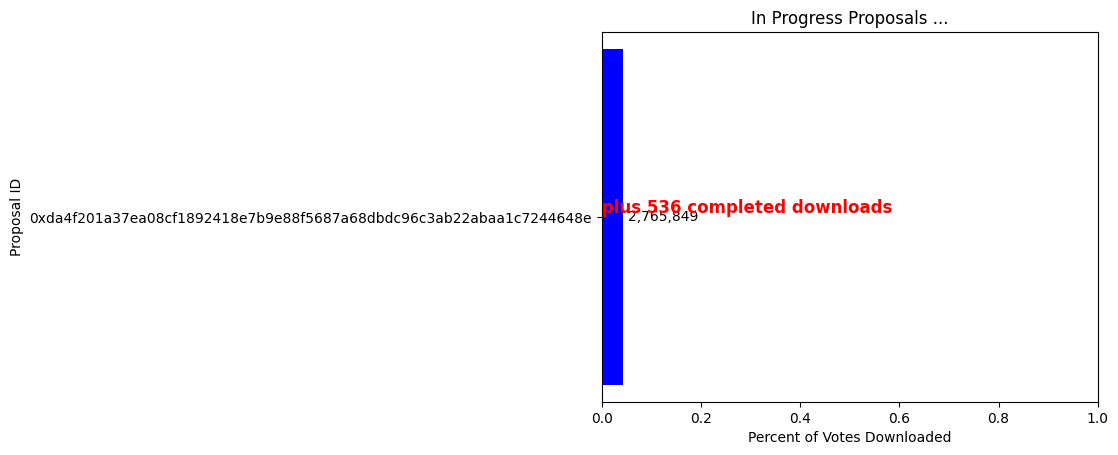

In [1358]:
# make a bar chart of percent_downloaded horizontally with a range of 0 to 1
import matplotlib.pyplot as plt
incomplete_proposals.sort_values("percent_downloaded", ascending=False, inplace=True)
plt.barh(incomplete_proposals.proposal_id, incomplete_proposals.percent_downloaded, color='b')
# sort by percent_downloaded
# label bars with total_votes
for i, v in enumerate(incomplete_proposals.total_votes):
    # make string with commas
    _ = label = str(f"{v:,}")
    # make the label line up with the bar
    _ = plt.text(incomplete_proposals.percent_downloaded.iloc[i] + 0.01, i, label, va='center')
plt.xlim(0, 1)

# color the bar green if total_votes equals downloaded_votes
for i, v in enumerate(incomplete_proposals.downloaded_votes):
    if v >= incomplete_proposals.total_votes.iloc[i]:
        plt.gca().get_children()[i].set_color('g')

plt.xlabel("Percent of Votes Downloaded")
plt.ylabel("Proposal ID")
plt.title("In Progress Proposals ...")
# add subtitle
plt.text(0, 0.01, f"plus {files_per_proposal.remainder.count()} completed downloads", fontsize=12, color='r', fontweight='bold')
# # make plot tall
# plt.gcf().set_size_inches(4, 36)
plt.show()

In [1359]:
# check on the big one
files_per_proposal.sort_values("total_votes", ascending=False).iloc[0]

proposal_id           0xda4f201a37ea08cf1892418e7b9e88f5687a68dbdc96...
file_count                                                          117
remainder                                                           NaN
total_votes                                                     2765849
downloaded_votes                                               117000.0
percent_downloaded                                             0.042302
Name: 452, dtype: object

In [1360]:
# total votes downloaded
files_per_proposal.downloaded_votes.sum()

12987554.0

In [1361]:
# total progress %
files_per_proposal.downloaded_votes.sum() / large_proposals_and_votes.vote.sum()

0.8589172667874888

In [1362]:
per_min_rate = files_per_proposal.downloaded_votes.sum() / 15
# this is the per min rate
per_min_rate

865836.9333333333

In [1363]:
# total votes to download, calculate from the large_proposals_and_votes
large_proposals_and_votes.vote.sum() / per_min_rate
# expected 231 mins to download

17.463847311048717